In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Feature Engineering/Handling Null Values/archive/tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.drop(['PassengerId','Name'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [6]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [8]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
109,1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S
176,1068,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,NaN,S
366,1258,3,"Caram, Mr. Joseph",male,NaN,1,0,2689,14.4583,NaN,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
280,1172,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S


In [9]:
y_train.head()

109    0
176    1
366    0
407    0
280    1
Name: Survived, dtype: int64

In [10]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             59
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          217
Embarked         0
dtype: int64

## **Handling Age column**

By Mean 

In [11]:
a=X_train['Age'].mean()

In [12]:
a

30.73941176470588

In [13]:
def mean(X_train,value,var):
  X_train[var+"_mean_replaced"]=X_train['Age'].fillna(value)



In [14]:
mean(X_train,a,'Age')

In [15]:
X_train.Age.std()

14.745289390102217

In [16]:
X_train.Age.var()

217.42355919786098

In [18]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced
109,1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S,18.500000
176,1068,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,NaN,S,20.000000
366,1258,3,"Caram, Mr. Joseph",male,NaN,1,0,2689,14.4583,NaN,C,30.739412
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,50.000000
280,1172,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S,23.000000


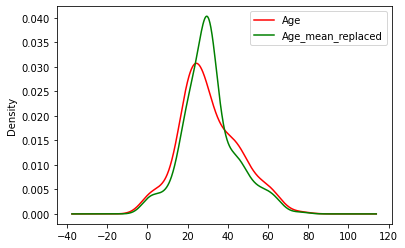

In [22]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
X_train['Age'].plot(kind='kde',color='r',ax=ax,label='Age')
X_train['Age_mean_replaced'].plot(kind='kde',color='g',ax=ax,label='Age_mean_replaced')
plt.legend(loc=0)


In [26]:
b=X_train['Age'].median()
b

28.0

In [27]:
def median(X_train,value,var):
  
  X_train[var+'_median_replace']=X_train['Age'].fillna(value)
median(X_train,b,'Age')

In [28]:
X_train.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_replaced,Age_median_replace
109,1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0,F,S,18.5,18.5


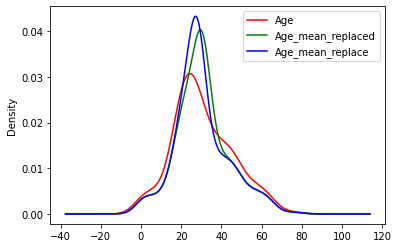

In [29]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
X_train['Age'].plot(kind='kde',color='r',ax=ax,label='Age')
X_train['Age_mean_replaced'].plot(kind='kde',color='g',ax=ax,label='Age_mean_replaced')
X_train['Age_median_replace'].plot(kind='kde',color='b',ax=ax,label='Age_mean_replace')

plt.legend(loc=0)
